In [215]:
import pandas as pd#importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# **Exploratory Data Analysis (EDA)**

In [216]:
df=pd.read_csv('/content/Titanic_train.csv')#loading dataset

In [217]:
df.head()#checking first 5 rows of dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [218]:
df.info()#checking null values,datatype,number of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [219]:
df.isna().sum()#checking null values of all the columns

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


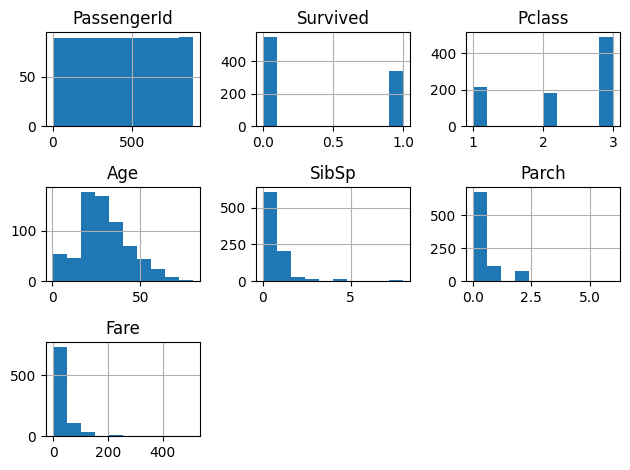

In [220]:
df.hist()#histogram of dataset
plt.tight_layout()

<Axes: >

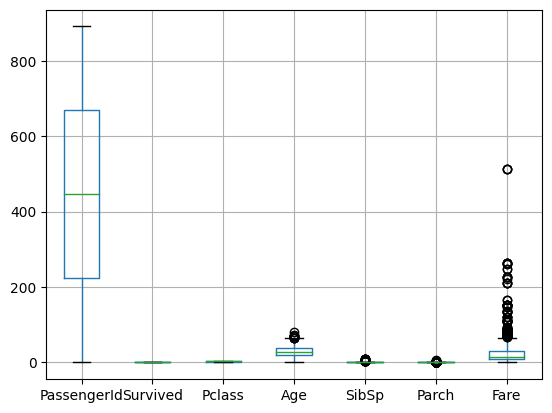

In [221]:
df.boxplot()#boxplot of dataset

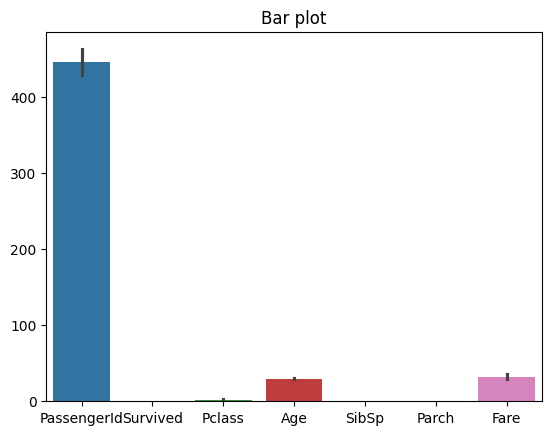

In [222]:
sns.barplot(df)#barplot of dataset
plt.title("Bar plot")
plt.show()

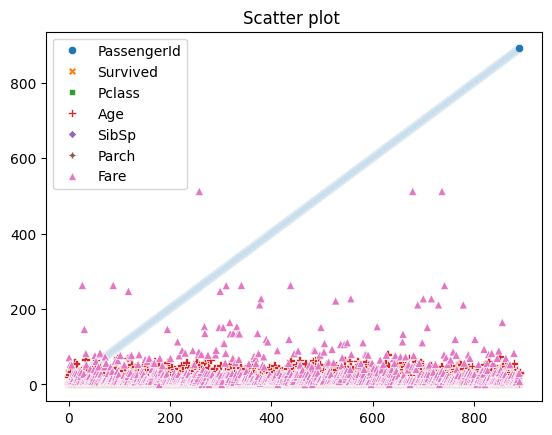

In [223]:
sns.scatterplot(data=df)#scatterplot of dataset
plt.title('Scatter plot ')
plt.show()

# **Data Preprocessing**

In [224]:
#replacing null values and deleting the columns(which have lot of null values)
df['Age'].fillna(df['Age'].median(), inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [225]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [226]:
df.head()#checking data after dropping cabin column

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [227]:
def cap_upper_outliers(df, column):#imputation of outliers
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Compute the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the upper bound (threshold for outliers)
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    # Cap values above the upper bound
    df[column] = df[column].apply(lambda x: min(x, upper_bound))
    df[column] = df[column].apply(lambda x: max(min(x,upper_bound),lower_bound))
    return df

# List of numerical columns to cap outliers
columns_to_cap = ['Age', 'SibSp' ,'Parch','Fare']
      # Include 'fbs' if it's not binary

# Apply the capping function to each column
for col in columns_to_cap:
    df = cap_upper_outliers(df, col)

<Axes: >

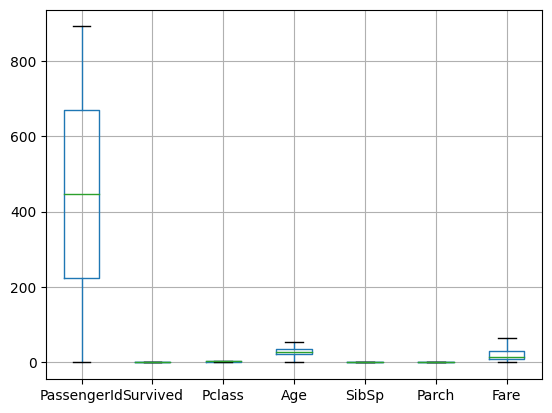

In [228]:
df.boxplot()#checking for outliers

In [229]:
from sklearn.preprocessing import LabelEncoder

# Initializing the LabelEncoder
le = LabelEncoder()

# Listing categorical columns to encode using LabelEncoder
categorical_cols = ['Name','Sex','Ticket','Embarked']  # Choosing categorical columns

# Applying LabelEncoder to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# **Building Predictive Models**

In [230]:
#Splitting the data into X,y
from sklearn.model_selection import train_test_split
X=df.drop(columns='Survived')
y=df['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [231]:
#Model bulding
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import  accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1
#lightGBM
lgb_model=lgb.LGBMClassifier(min_split_gain=0.0,max_depth=2,random_state=1,verbose=-1)
lgb_model.fit(X_train,y_train)
lgb_acc,lgb_prec,lgb_rec,lgb_f1=evaluate_model(lgb_model,X_test,y_test)
#XGBM
xgb_model=xgb.XGBClassifier(max_depth=3,random_state=42,eval_metrics='logloss')
xgb_model.fit(X_train,y_train)
xgb_acc,xgb_prec,xgb_rec,xgb_f1=evaluate_model(xgb_model,X_test,y_test)

In [232]:
print('lightGBM:',{lgb_acc,lgb_prec,lgb_rec,lgb_f1})
print('XGBM:',{xgb_acc,xgb_prec,xgb_rec,xgb_f1})

lightGBM: {0.7821229050279329, 0.84, 0.5753424657534246, 0.6829268292682927}
XGBM: {0.7821229050279329, 0.7931034482758621, 0.7022900763358778, 0.6301369863013698}


In [233]:
from sklearn.model_selection import GridSearchCV

# LightGBM Hyperparameter tuning
lgb_params = {'n_estimators': [100, 200],
              'learning_rate': [0.01, 0.1],
              'num_leaves': [31, 50]}

lgb_grid = GridSearchCV(lgb.LGBMClassifier(random_state=1), lgb_params, cv=5, scoring='accuracy')
lgb_grid.fit(X_train, y_train)
lgb_best = lgb_grid.best_estimator_
lgb_best_acc, lgb_best_prec, lgb_best_rec, lgb_best_f1 = evaluate_model(lgb_best, X_test, y_test)

In [234]:
lgb_grid.best_params_#parameters which are tuned

{'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 31}

In [235]:
# XGBoost Hyperparameter tuning
xgb_params = {'n_estimators': [100, 200],
              'learning_rate': [0.01, 0.1],
              'max_depth': [3, 6]}

xgb_grid = GridSearchCV(xgb.XGBClassifier(random_state=42, eval_metric='logloss'),xgb_params, cv=5, scoring='accuracy')
xgb_grid.fit(X_train, y_train)
xgb_best = xgb_grid.best_estimator_
xgb_best_acc, xgb_best_prec, xgb_best_rec, xgb_best_f1 = evaluate_model(xgb_best, X_test, y_test)

In [236]:
xgb_grid.best_params_#parameters which are tuned

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [237]:
#re-building the model with best tuning parameters
Tunedlgb_model=lgb.LGBMClassifier(learning_rate=0.1,n_estimators=200,num_leaves=31,min_split_gain=0.0,max_depth=2,random_state=1,verbose=-1)
Tunedlgb_model.fit(X_train,y_train)
lgb_best_acc,lgb_best_prec,lgb_best_rec,lgb_best_f1=evaluate_model(Tunedlgb_model,X_test,y_test)

Tunedxgb_model=xgb.XGBClassifier(learning_rate=0.1,max_depth=3,n_estimators=100,random_state=42,eval_metrics='logloss')
Tunedxgb_model.fit(X_train,y_train)
xgb_best_acc,xgb_best_prec,xgb_best_rec,xgb_best_f1=evaluate_model(Tunedxgb_model,X_test,y_test)

In [238]:
#Evaluation metrics of tuned algorithms
print(f"Tuned LightGBM - Accuracy: {lgb_best_acc}, Precision: {lgb_best_prec}, Recall: {lgb_best_rec}, F1-Score: {lgb_best_f1}")
print(f"Tuned XGBoost - Accuracy: {xgb_best_acc}, Precision: {xgb_best_prec}, Recall: {xgb_best_rec}, F1-Score: {xgb_best_f1}")

Tuned LightGBM - Accuracy: 0.7653631284916201, Precision: 0.803921568627451, Recall: 0.5616438356164384, F1-Score: 0.6612903225806451
Tuned XGBoost - Accuracy: 0.7653631284916201, Precision: 0.7818181818181819, Recall: 0.589041095890411, F1-Score: 0.671875


# **Comparative Analysis**

In [239]:
results = pd.DataFrame({#converting evaluation metrics as dataframe for better understanding
    'Model': ['LightGBM', 'XGBoost', 'Tuned LightGBM', 'Tuned XGBoost'],
    'Accuracy': [lgb_acc, xgb_acc, lgb_best_acc, xgb_best_acc],
    'Precision': [lgb_prec, xgb_prec, lgb_best_prec, xgb_best_prec],
    'Recall': [lgb_rec, xgb_rec, lgb_best_rec, xgb_best_rec],
    'F1-Score': [lgb_f1, xgb_f1, lgb_best_f1, xgb_best_f1]
})

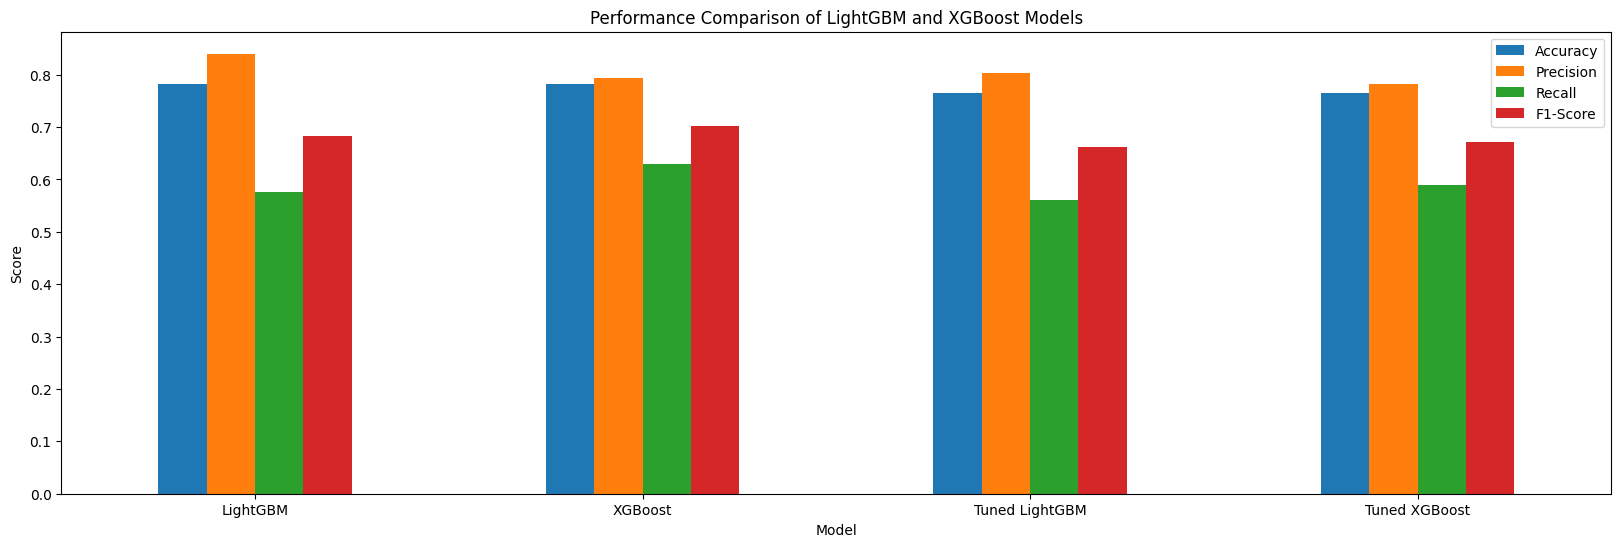

In [240]:
results.set_index('Model').plot(kind='bar', figsize=(20, 6))#visulization of results
plt.title('Performance Comparison of LightGBM and XGBoost Models')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

# **Test data**

# **Exploratory Data Analysis (EDA)**

In [241]:
#Loading the test dataset
test_data = pd.read_csv('/content/Titanic_test.csv')

In [242]:
test_data.info()#checking datatypes,null values,datatypes,number of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [243]:
test_data.describe()#summary statistics

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


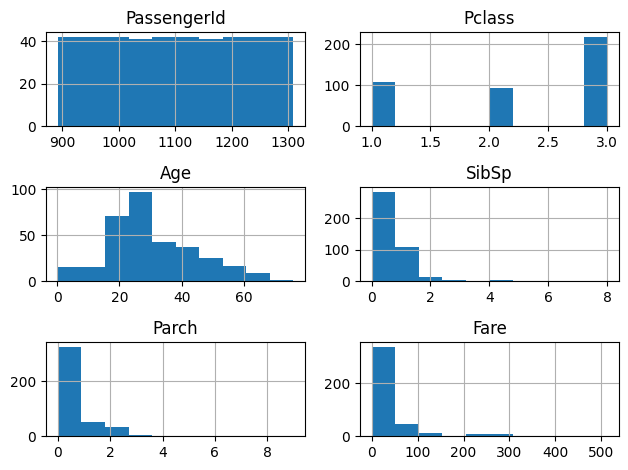

In [244]:
test_data.hist()#histogram of dataset
plt.tight_layout()

<Axes: >

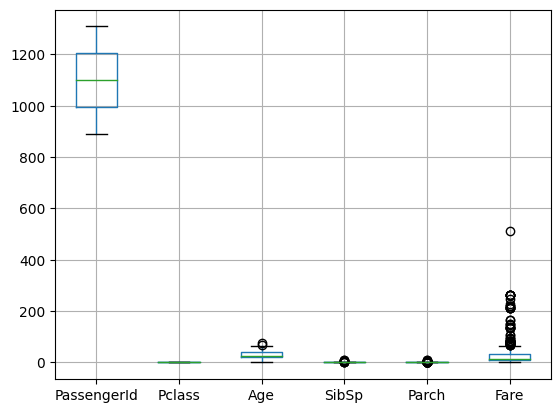

In [245]:
test_data.boxplot()#boxplot of dataset

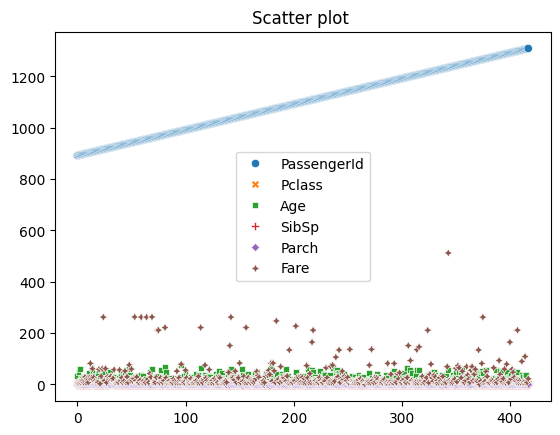

In [246]:
sns.scatterplot(data=test_data)#scatterplot of dataset
plt.title('Scatter plot ')
plt.show()

# **Data Preprocessing**

In [247]:
#replacing null values and deleting the columns(which have lot of null values)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data.drop(columns=['Cabin'], inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mode()[0], inplace=True)

In [248]:
test_data.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [249]:
from sklearn.preprocessing import LabelEncoder

# Initializing the LabelEncoder
le = LabelEncoder()

# Listing categorical columns to encode using LabelEncoder
categorical_cols = ['Name','Sex','Parch','Fare','Ticket','Embarked']  # Choosing categorical columns

# Applying LabelEncoder to each categorical column
for col in categorical_cols:
    test_data[col] = le.fit_transform(test_data[col])

In [250]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    int64  
 8   Fare         418 non-null    int64  
 9   Embarked     418 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 32.8 KB


In [251]:
def cap_upper_outliers(test_data, column):#imputation of outliers
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = test_data[column].quantile(0.25)
    Q3 =test_data[column].quantile(0.75)

    # Compute the IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Define the upper bound (threshold for outliers)
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    # Cap values above the upper bound
    test_data[column] = test_data[column].apply(lambda x: min(x, upper_bound))
    test_data[column] = test_data[column].apply(lambda x: max(min(x,upper_bound),lower_bound))
    return test_data

# List of numerical columns to cap outliers
columns_to_cap = ['Age', 'SibSp' ,'Parch','Fare']
      # Include 'fbs' if it's not binary

# Apply the capping function to each column
for col in columns_to_cap:
    test_data = cap_upper_outliers(test_data, col)

<Axes: >

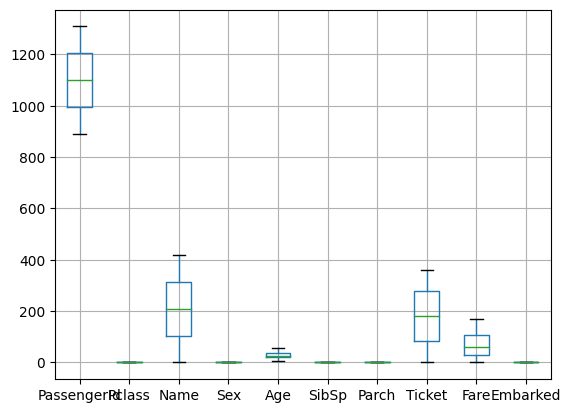

In [252]:
test_data.boxplot()#checking for outliers

In [253]:
test_data.head()#changed into numerical values

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,206,1,34.500,0.0,0.0,152,24,1
1,893,3,403,0,47.000,1.0,0.0,221,5,2
2,894,2,269,1,54.875,0.0,0.0,73,41,1
3,895,3,408,1,27.000,0.0,0.0,147,34,2
4,896,3,178,0,22.000,1.0,0.0,138,46,2


# **Building Predictive Models**

In [254]:
#Splitting the data into X,y
from sklearn.model_selection import train_test_split
X=test_data.drop(columns='Embarked')
y=test_data['Embarked']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [255]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test):
    y_pred = lgb_modelT.predict(X_test)
    y_pred = xgb_modelT.predict(X_test)
    # Use 'macro', 'micro', or 'weighted' to handle multi-class cases
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' accounts for class imbalance
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    return accuracy, precision, recall, f1

In [256]:
import lightgbm as lgb
import xgboost as xgb

# LightGBM
lgb_modelT = lgb.LGBMClassifier(min_split_gain=0.0, max_depth=2, random_state=1, verbose=-1)
lgb_modelT.fit(X_train, y_train)
lgb_acc1, lgb_prec1, lgb_rec1, lgb_f11 = evaluate_model(lgb_modelT, X_test, y_test)

# XGBoost
xgb_modelT = xgb.XGBClassifier(max_depth=3, random_state=42, eval_metric='logloss')
xgb_modelT.fit(X_train, y_train)
xgb_acc1, xgb_prec1, xgb_rec1, xgb_f11 = evaluate_model(xgb_modelT, X_test, y_test)


In [272]:
print('lightGBM(test_data):',{lgb_acc1,lgb_prec1,lgb_rec1,lgb_f11})
print('XGBM(test_data):',{xgb_acc1,xgb_prec1,xgb_rec1,xgb_f11})

lightGBM(test_data): {0.9166666666666666, 0.9180555555555556, 0.915584505100634}
XGBM(test_data): {0.9166666666666666, 0.9180555555555556, 0.915584505100634}


In [273]:
# XGBoost Hyperparameter tuning
xgb_params1 = {'n_estimators': [100, 200],
              'learning_rate': [0.01, 0.1],
              'max_depth': [3, 6]}

xgb_grid1 = GridSearchCV(xgb.XGBClassifier(random_state=42, eval_metric='logloss'),xgb_params1, cv=5, scoring='accuracy')
xgb_grid1.fit(X_train, y_train)
xgb_best1 = xgb_grid1.best_estimator_
xgb_best1_acc, xgb_best1_prec, xgb_best1_rec, xgb_best1_f1 = evaluate_model(xgb_best1, X_test, y_test)

In [274]:
xgb_grid1.best_params_#parameters which are tuned

{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200}

In [275]:
from sklearn.model_selection import GridSearchCV

# LightGBM Hyperparameter tuning
lgb_params1 = {'n_estimators': [100, 200],
              'learning_rate': [0.01, 0.1],
              'num_leaves': [31, 50]}

lgb_grid1 = GridSearchCV(lgb.LGBMClassifier(random_state=1), lgb_params1, cv=5, scoring='accuracy')
lgb_grid1.fit(X_train, y_train)
lgb_best1 = lgb_grid1.best_estimator_
lgb_best1_acc, lgb_best1_prec, lgb_best1_rec, lgb_best1_f1 = evaluate_model(lgb_best, X_test, y_test)

In [276]:
lgb_grid1.best_params_#parameters which are tuned

{'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 31}

In [277]:
#re-building the model with best tuning parameters
Tunedlgb_modelTD=lgb.LGBMClassifier(learning_rate=0.1,n_estimators=200,num_leaves=31,min_split_gain=0.0,max_depth=2,random_state=1,verbose=-1)
Tunedlgb_modelTD.fit(X_train,y_train)
lgb_best_acc2,lgb_best_prec2,lgb_best_rec2,lgb_best_f12=evaluate_model(Tunedlgb_modelTD,X_test,y_test)

Tunedxgb_modelTD=xgb.XGBClassifier(learning_rate=0.1,max_depth=3,n_estimators=100,random_state=42,eval_metrics='logloss')
Tunedxgb_modelTD.fit(X_train,y_train)
xgb_best_acc2,xgb_best_prec2,xgb_best_rec2,xgb_best_f12=evaluate_model(Tunedxgb_modelTD,X_test,y_test)

In [278]:
# Printing tuned results
print(f"Tuned LightGBM(test_data) - Accuracy: {lgb_best_acc2}, Precision: {lgb_best_prec2}, Recall: {lgb_best_rec2}, F1-Score: {lgb_best_f12}")
print(f"Tuned XGBoost(test_data) - Accuracy: {xgb_best_acc2}, Precision: {xgb_best_prec2}, Recall: {xgb_best_rec2}, F1-Score: {xgb_best_f12}")

Tuned LightGBM(test_data) - Accuracy: 0.9166666666666666, Precision: 0.9180555555555556, Recall: 0.9166666666666666, F1-Score: 0.915584505100634
Tuned XGBoost(test_data) - Accuracy: 0.9166666666666666, Precision: 0.9180555555555556, Recall: 0.9166666666666666, F1-Score: 0.915584505100634


# **Comparative Analysis**

In [279]:
results1 = pd.DataFrame({#converting evaluation metrics as dataframe for better understanding
    'Model': ['LightGBM(test_data)', 'XGBoost(test_data)', 'Tuned LightGBM(test_data)', 'Tuned XGBoost(test_data)'],
    'Accuracy': [lgb_acc1, xgb_acc1, lgb_best_acc2, xgb_best_acc2],
    'Precision': [lgb_prec1, xgb_prec1, lgb_best_prec2, xgb_best_prec2],
    'Recall': [lgb_rec1, xgb_rec1, lgb_best_rec2, xgb_best_rec2],
    'F1-Score': [lgb_f11, xgb_f11, lgb_best_f12, xgb_best_f12]
})

In [280]:
results1

,Model,Accuracy,Precision,Recall,F1-Score
0,LightGBM(test_data),0.916667,0.918056,0.916667,0.915585
1,XGBoost(test_data),0.916667,0.918056,0.916667,0.915585
2,Tuned LightGBM(test_data),0.916667,0.918056,0.916667,0.915585
3,Tuned XGBoost(test_data),0.916667,0.918056,0.916667,0.915585


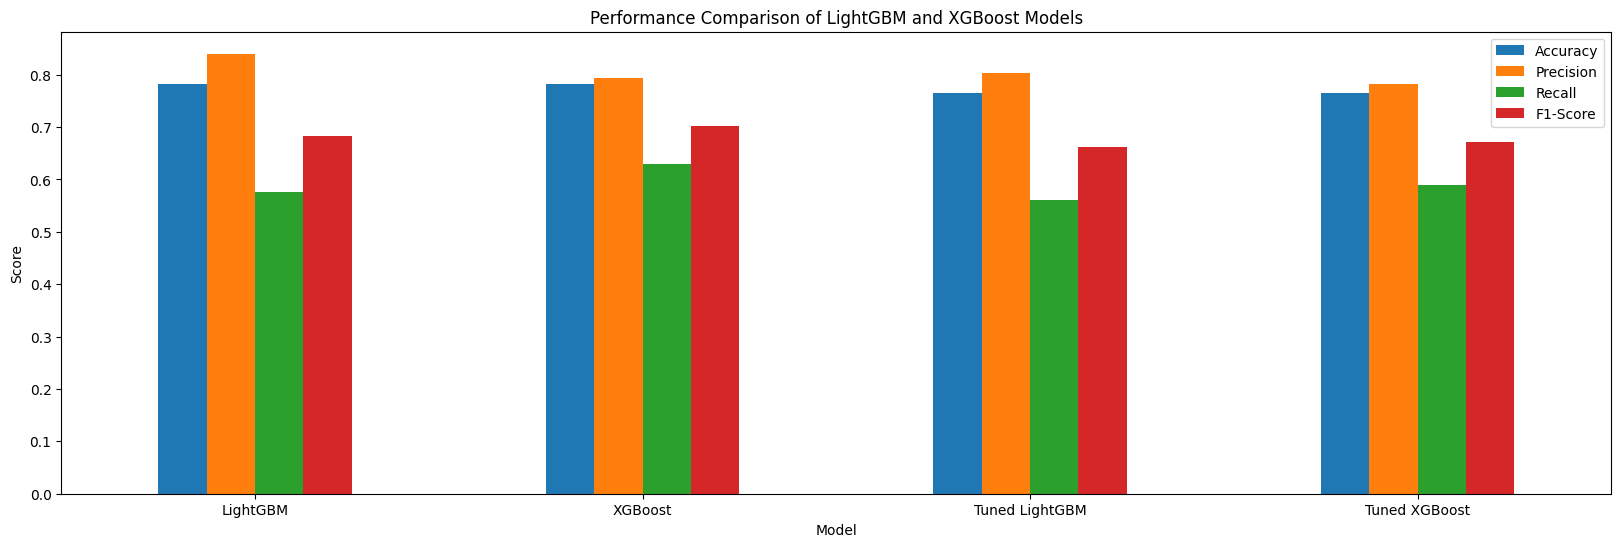

In [266]:
results.set_index('Model').plot(kind='bar', figsize=(20, 6))#visulization of results
plt.title('Performance Comparison of LightGBM and XGBoost Models')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

**LightGBM:**

# Strenght:

LightGBM is optimized for speed and can handle large datasets more efficiently.

LightGBM tends to perform better on large datasets with a high number of features and instances.

LightGBM requires less memory compared to XGBoost due to its efficient data structure.


# Weakness:


The models created by LightGBM can be more complex, leading to lower interpretability compared to simpler models.

LightGBM can be sensitive to hyperparameter choices, requiring careful tuning to achieve optimal performance.


**XGBOOST:**

# Strength:
XGBoost offers L1 and L2 regularization to prevent overfitting, which is particularly useful for datasets with many features.

It has mechanisms to prevent overfitting through cross-validation and early stopping.

XGBoost supports a wide range of loss functions and evaluation criteria, making it suitable for various types of predictive modeling tasks.

# Weakness:

XGBoost may be slower to train, especially with very large datasets due to its more complex handling of the data.

XGBoost can consume more memory, particularly with large datasets.
